# Random Forest Model interpretation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [4]:
set_plot_sizes(12,14,16)

In [5]:
!tree ../

../
├── README.md
├── fastai
│   ├── AUTHORS.md
│   ├── CHANGES.md
│   ├── CLA.md
│   ├── CODE-OF-CONDUCT.md
│   ├── CONTRIBUTING.md
│   ├── LICENSE
│   ├── MANIFEST.in
│   ├── Makefile
│   ├── README.md
│   ├── azure-pipelines.yml
│   ├── builds
│   │   ├── custom-conda-builds
│   │   │   ├── README.md
│   │   │   ├── dataclasses
│   │   │   │   └── meta.yaml
│   │   │   ├── torchvision
│   │   │   │   └── meta.yaml
│   │   │   └── torchvision-cpu
│   │   │       └── meta.yaml
│   │   └── custom-pip-builds
│   │       └── torchvision
│   │           ├── README.md
│   │           └── setup.py
│   ├── conda
│   │   └── meta.yaml
│   ├── conftest.py
│   ├── courses
│   │   ├── dl1
│   │   │   ├── adamw-sgdw-demo.ipynb
│   │   │   ├── cifar10-simplenet.ipynb
│   │   │   ├── cifar10.ipynb
│   │   │   ├── embedding_refactoring_unit_tests.ipynb
│   │   │   ├── excel
│   │   │   │   ├── collab_filter.xlsx
│   │   │   │   ├── conv-example.xlsx
│   │   │   │   ├── entropy_example.xlsx
│   │   │

│   │           │   │   │   ├── __init__.cpython-36.pyc
│   │           │   │   │   └── index.cpython-36.pyc
│   │           │   │   └── index.py
│   │           │   ├── operations
│   │           │   │   ├── __init__.py
│   │           │   │   ├── __pycache__
│   │           │   │   │   ├── __init__.cpython-36.pyc
│   │           │   │   │   ├── check.cpython-36.pyc
│   │           │   │   │   └── freeze.cpython-36.pyc
│   │           │   │   ├── check.py
│   │           │   │   └── freeze.py
│   │           │   ├── pep425tags.py
│   │           │   ├── req
│   │           │   │   ├── __init__.py
│   │           │   │   ├── __pycache__
│   │           │   │   │   ├── __init__.cpython-36.pyc
│   │           │   │   │   ├── req_file.cpython-36.pyc
│   │           │   │   │   ├── req_install.cpython-36.pyc
│   │           │   │   │   ├── req_set.cpython-36.pyc
│   │           │   │   │   └── req_uninstall.cpython-36.pyc
│   │           │   │   ├── req_file.py
│   │           │   │   ├── 

In [6]:
!ls tmp/bulldozers-raw

tmp/bulldozers-raw


In [7]:
#Load data 

PATH = "data/bulldozers/"

df_raw = pd.read_feather('tmp/bulldozers-raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [8]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [9]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [10]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


In [11]:
set_rf_samples(50000)

In [12]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20554437170804257, 0.24822474293759475, 0.9117029885155642, 0.8899631591811584, 0.8947533493366933]


In [13]:
#Todo - put in the R^2 notes right here - so the coexist

In [14]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.59 s, sys: 87.2 ms, total: 1.68 s
Wall time: 1.69 s


(9.213026614531303, 0.1962663155564823)

In [15]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 69.8 ms, sys: 83.6 ms, total: 153 ms
Wall time: 862 ms


(9.213026614531303, 0.1962663155564823)

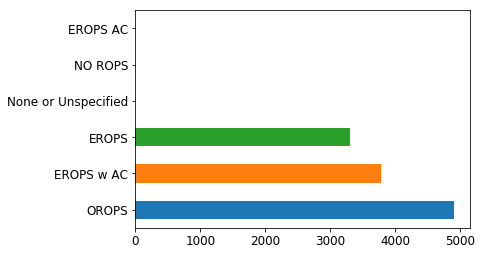

In [16]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [17]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.837960,0.272374
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.575970,0.265080
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.687907,0.220870


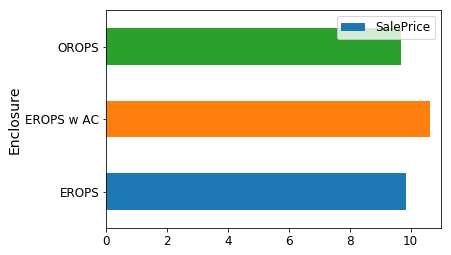

In [18]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

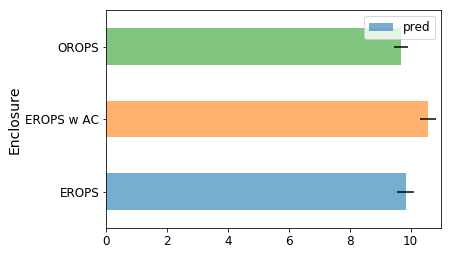

In [19]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

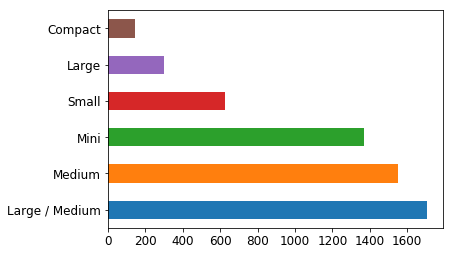

In [20]:
raw_valid.ProductSize.value_counts().plot.barh();

In [21]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.834449,0.342825
Large,10.470589,10.402500,0.360941
Large / Medium,10.691871,10.651197,0.294685
Medium,10.681511,10.620707,0.285995
Mini,9.535147,9.552900,0.247079
Small,10.324448,10.332590,0.313970


In [22]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.034860
Large             0.034698
Small             0.030386
Large / Medium    0.027667
Medium            0.026928
Mini              0.025864
dtype: float64

In [23]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.173762
13,ProductSize,0.103314
37,Coupler_System,0.099448
14,fiProductClassDesc,0.076513
2,ModelID,0.053039
38,Grouser_Tracks,0.052091
63,saleElapsed,0.050820
39,Hydraulics_Flow,0.049075
10,fiSecondaryDesc,0.043690
8,fiModelDesc,0.033664


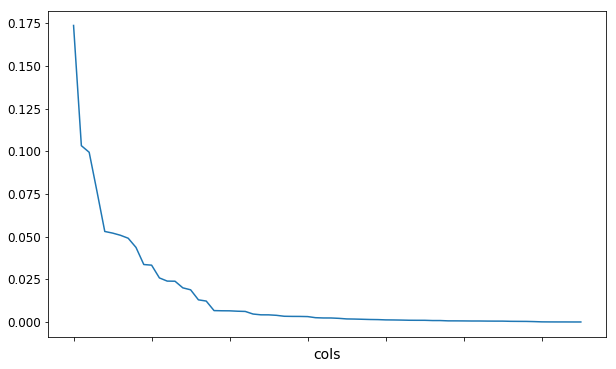

In [24]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [25]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

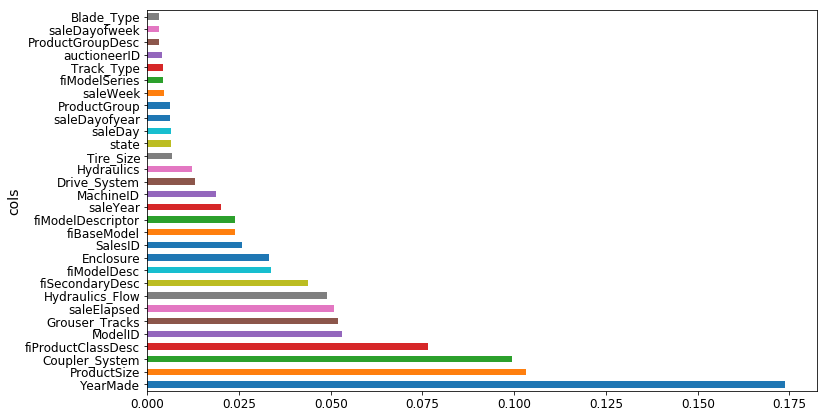

In [26]:
plot_fi(fi[:30]);

In [27]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

23

In [28]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [29]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2072537781441016, 0.244954803620374, 0.9102282402196877, 0.8928431607488241, 0.8939080517366383]


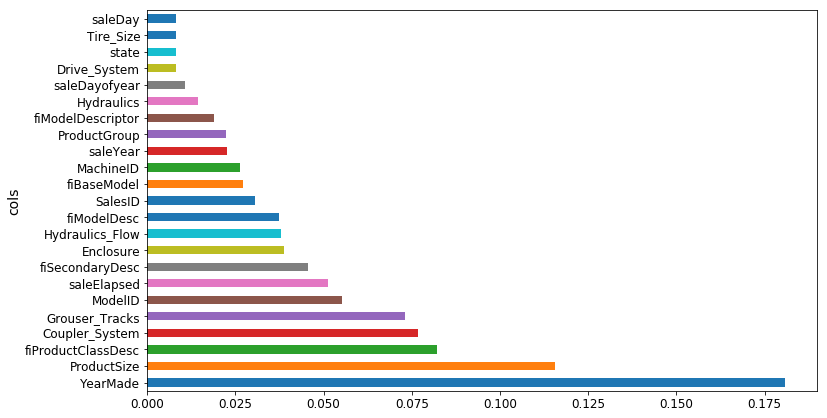

In [30]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [31]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20678854348305412, 0.25406582642417214, 0.9106308196902574, 0.8847235799513959, 0.8929695531354254]


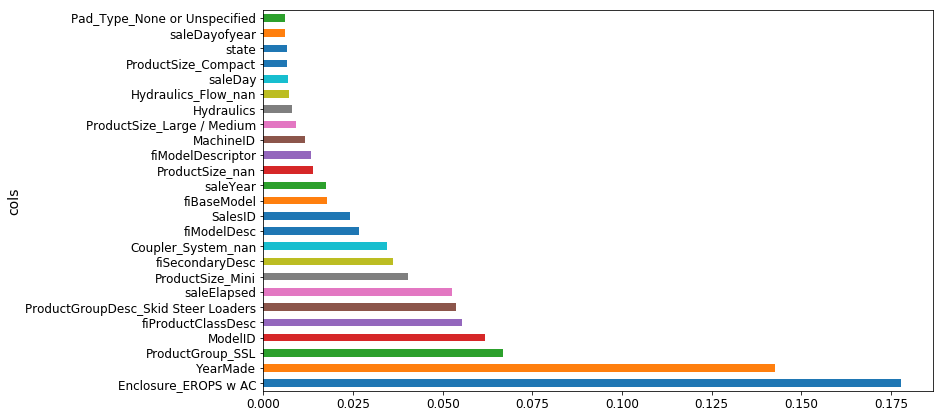

In [32]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [33]:
from scipy.cluster import hierarchy as hc

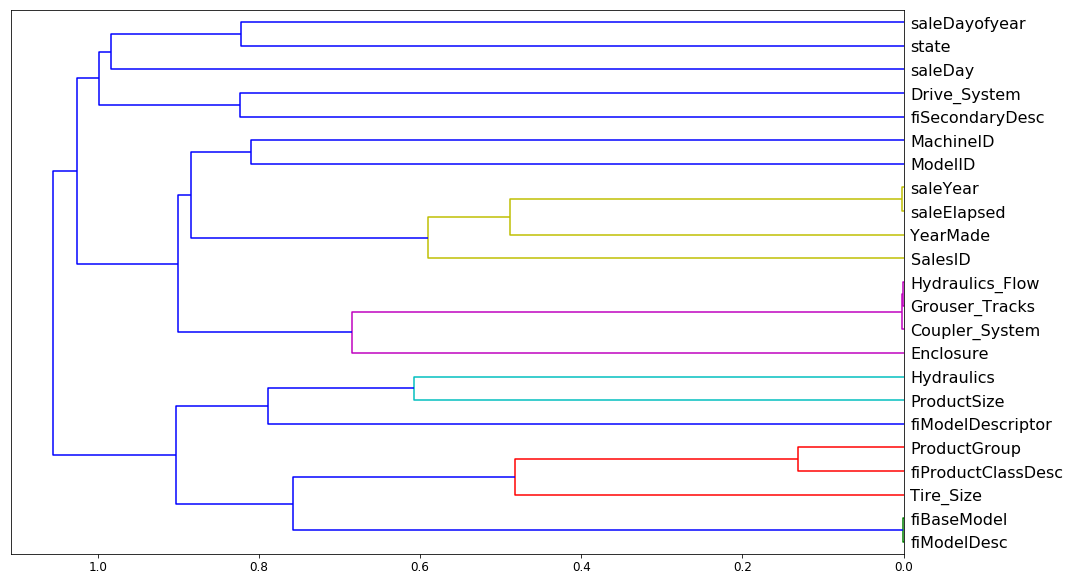

In [34]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [35]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [36]:
get_oob(df_keep)

0.8897585674593852

In [37]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.8898589400801569
saleElapsed 0.8874943145752747
fiModelDesc 0.8891714806059361
fiBaseModel 0.8899292531286854
Grouser_Tracks 0.8911051072818157
Coupler_System 0.8900027949169953


In [38]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.8890365708624283

In [39]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [40]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [41]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

In [42]:
reset_rf_samples()

In [43]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1249705633814151, 0.22644281809425396, 0.9673599901276666, 0.9084274989041572, 0.9087817514728005]


In [44]:
from pdpbox import pdp
from plotnine import *

In [45]:
set_rf_samples(50000)

In [46]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

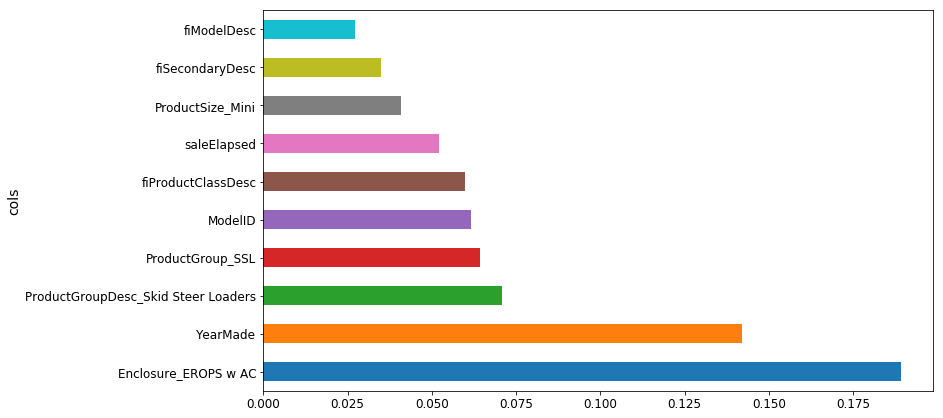

In [47]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

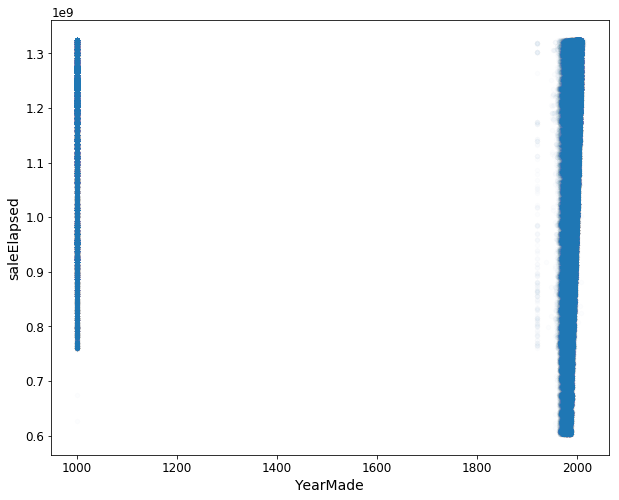

In [48]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [49]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

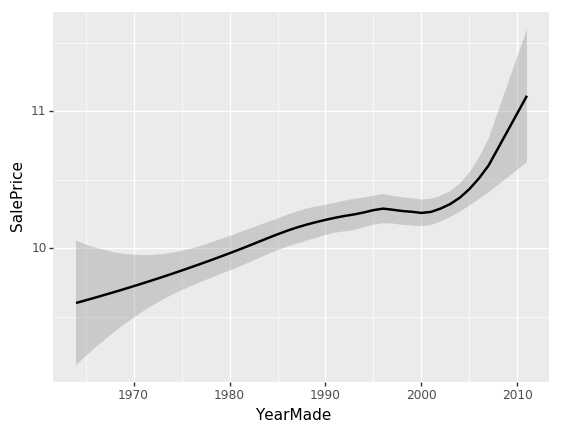

<ggplot: (-9223372029305183088)>

In [50]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [51]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [52]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c306df9e8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c22700ba8>})

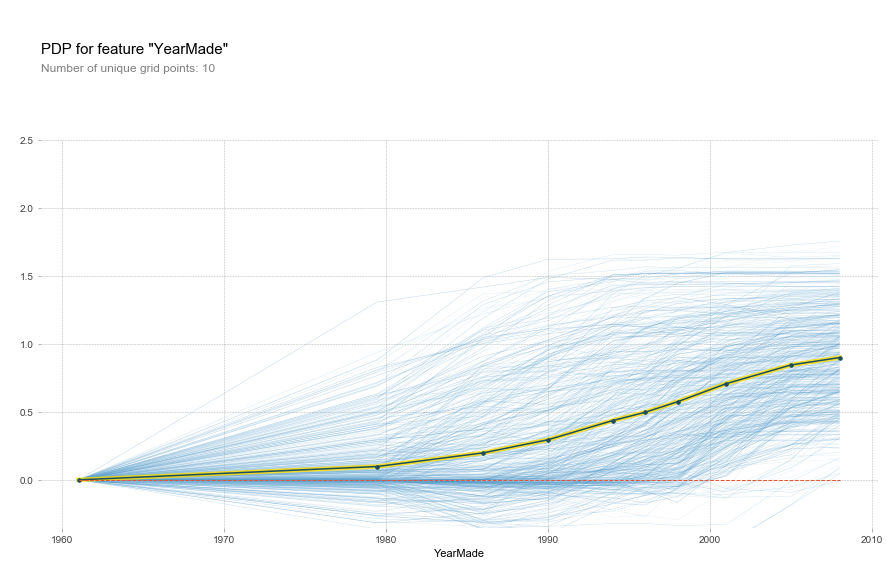

In [53]:
plot_pdp('YearMade')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2195d358>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c21944390>})

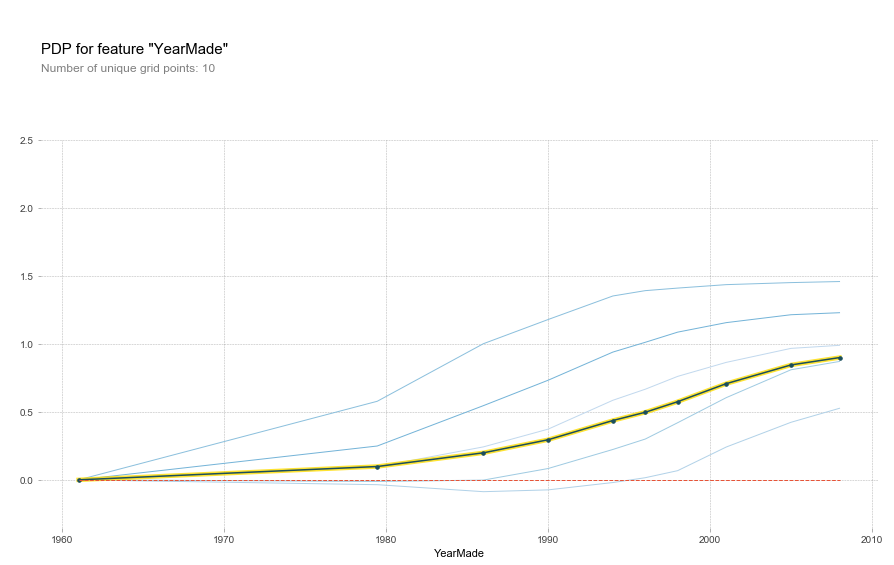

In [54]:
plot_pdp('YearMade', clusters=5)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c23849c50>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c239272e8>})

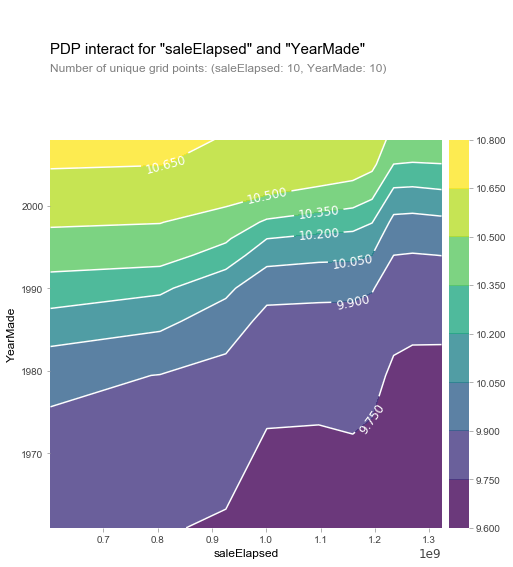

In [55]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2431e080>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c26610320>})

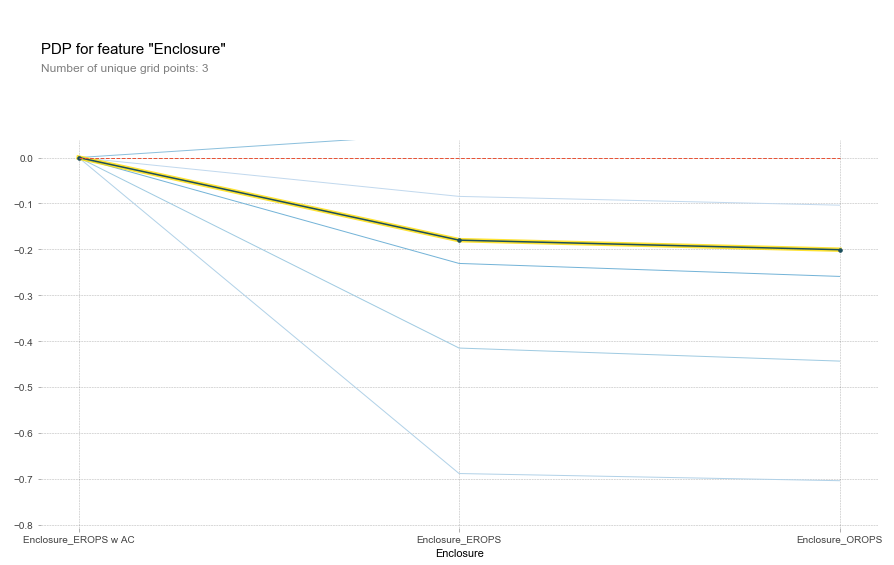

In [56]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [57]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

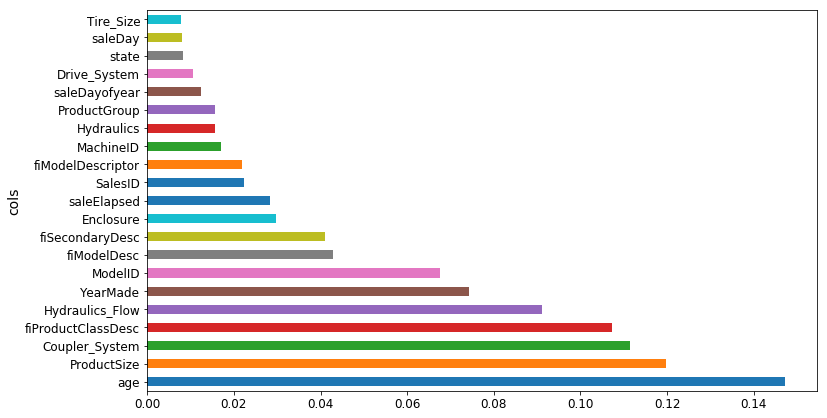

In [58]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

In [59]:
from treeinterpreter import treeinterpreter as ti

In [60]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [61]:
row = X_valid.values[None,0]; row

array([[      1999,          5,          0,         17,        665, 1284595200,          0,          0,
              3232,          1,    4364751,          0,    2300944,          0,         12,          0,
                35,         16,        259,          4,         11]])

In [62]:
prediction, bias, contributions = ti.predict(m, row)

In [63]:
prediction[0], bias[0]

(9.380756028177721, 10.105578541379545)

In [64]:
idxs = np.argsort(contributions[0])

In [65]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.4746780366847405),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.13435967491075132),
 ('age', 11, -0.12992684857788292),
 ('fiModelDesc', 'KX1212', -0.07791330655643622),
 ('fiSecondaryDesc', nan, -0.047908030021239466),
 ('fiModelDescriptor', nan, -0.03643210536053387),
 ('saleElapsed', 1284595200, -0.0265472033262379),
 ('Enclosure', 'EROPS', -0.022386684064901317),
 ('Tire_Size', nan, -0.019440387222748035),
 ('saleDayofyear', 259, -0.01524846893043974),
 ('SalesID', 4364751, -0.009716614437039039),
 ('state', 'Ohio', -0.007071329450779107),
 ('ProductGroup', 'TEX', -0.0016307703050419064),
 ('saleDay', 16, 0.00434525487361741),
 ('Hydraulics', 'Standard', 0.006495342801020954),
 ('MachineID', 2300944, 0.008074588429231167),
 ('Drive_System', nan, 0.009540592303593654),
 ('ModelID', 665, 0.039634376084890954),
 ('Hydraulics_Flow', nan, 0.04478248027623888),
 ('Coupler_System', nan, 0.05508633989244958),
 ('YearMade'

In [66]:
contributions[0].sum()

-0.724822513201824

In [67]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [68]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999750701153007

In [69]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
10,SalesID,0.746266
5,saleElapsed,0.183946
12,MachineID,0.055185
18,saleDayofyear,0.003285
8,fiModelDesc,0.002548
4,ModelID,0.002100
7,fiSecondaryDesc,0.001545
0,YearMade,0.001231
2,Coupler_System,0.000961
9,Enclosure,0.000836


In [70]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [71]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [72]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [73]:
x.drop(feats, axis=1, inplace=True)

In [74]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9789342474291056

In [75]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
17,age,0.226460
0,YearMade,0.186918
15,saleDayofyear,0.164180
4,ModelID,0.077646
7,fiModelDesc,0.065032
13,state,0.058692
14,saleDay,0.056845
3,fiProductClassDesc,0.033260
6,fiSecondaryDesc,0.024190
8,Enclosure,0.021568


In [76]:
set_rf_samples(50000)

In [77]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [78]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20823210313945137, 0.24729386462920336, 0.9093787189710699, 0.8907869194699198, 0.8928581859467749]


In [79]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.20917386513375927, 0.24631326956264352, 0.9085571677590112, 0.8916513281234932, 0.8922339431413632]
saleElapsed
[0.21425719087128642, 0.25557868456553096, 0.9040586910761638, 0.883346644658075, 0.8867890413800441]
MachineID
[0.20649913321590235, 0.24536340924074077, 0.9108807973604109, 0.8924853689880241, 0.895201241723962]
age
[0.20848596993054042, 0.24734005683651689, 0.9091576218661881, 0.890746115672178, 0.8925332540775812]
YearMade
[0.2087963335422352, 0.2503107183260134, 0.9088869546911046, 0.8881059825532844, 0.8923342354526276]
saleDayofyear
[0.20874587140613168, 0.24350713354770506, 0.908930989978692, 0.8941060006567503, 0.8927118980411901]


In [80]:
reset_rf_samples()

In [81]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13758167505377486, 0.21777796554099546, 0.9604400247305478, 0.9153014751142334, 0.9091192639328609]


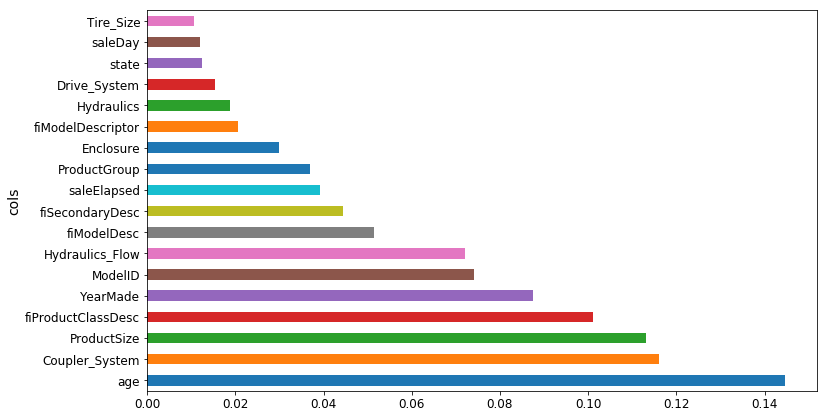

In [82]:
plot_fi(rf_feat_importance(m, X_train));

In [83]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

In [ ]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)